## Init

In [ ]:
library(dplyr)
library(corrplot)
library(ggplot2)
library(vcd)
library(car)
library(caret)


theme_sleepy <- theme_minimal() + theme(
    panel.grid.major = element_line(color = "#3e63ca55"),
    axis.line.x = element_line(color = "#3e63ca", size = 1),
    axis.line.y = element_line(color = "#3e63ca", size = 1),

    title = element_text(size = 28, color = "#2a4285"),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14)
)
seed <- 16

data <- read.csv("data\\Sleep_health_and_lifestyle_dataset.csv")
cat("General overview:\n")
glimpse(data)

Installing package into ‘C:/Users/Meri/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


  There is a binary version available but the source version is later:
       binary source needs_compilation
future 1.67.0 1.68.0             FALSE



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/listenv_0.10.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/parallelly_1.45.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/globals_0.18.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/future.apply_1.20.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/progressr_0.18.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/SQUAREM_2021.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/diagram_1.6.5.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/lava_1.8.2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/prodlim_2025.04.28.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/proxy_0.4-27.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/clock_0.7.3.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/gower_1.0.2.zip'
trying URL 'https://cran.rs

package ‘listenv’ successfully unpacked and MD5 sums checked
package ‘parallelly’ successfully unpacked and MD5 sums checked
package ‘globals’ successfully unpacked and MD5 sums checked
package ‘future.apply’ successfully unpacked and MD5 sums checked
package ‘progressr’ successfully unpacked and MD5 sums checked
package ‘SQUAREM’ successfully unpacked and MD5 sums checked
package ‘diagram’ successfully unpacked and MD5 sums checked
package ‘lava’ successfully unpacked and MD5 sums checked
package ‘prodlim’ successfully unpacked and MD5 sums checked
package ‘proxy’ successfully unpacked and MD5 sums checked
package ‘clock’ successfully unpacked and MD5 sums checked
package ‘gower’ successfully unpacked and MD5 sums checked
package ‘hardhat’ successfully unpacked and MD5 sums checked
package ‘ipred’ successfully unpacked and MD5 sums checked
package ‘sparsevctrs’ successfully unpacked and MD5 sums checked
package ‘timeDate’ successfully unpacked and MD5 sums checked
package ‘e1071’ succ

trying URL 'https://cran.rstudio.com/src/contrib/future_1.68.0.tar.gz'
Content type 'application/x-gzip' length 443211 bytes (432 KB)
downloaded 432 KB



* installing *source* package 'future' ...
** this is package 'future' version '1.68.0'
** package 'future' successfully unpacked and MD5 sums checked
** using staged installation
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (future)



The downloaded source packages are in
	‘C:\Users\Meri\AppData\Local\Temp\RtmpgFzsx5\downloaded_packages’


Loading required package: lattice


Warning message:
package ‘caret’ was built under R version 4.5.2 


General overview:
Rows: 374
Columns: 13
$ Person.ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, …
$ Gender                  <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male",…
$ Age                     <int> 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30,…
$ Occupation              <chr> "Software Engineer", "Doctor", "Doctor", "Sales Representative", "Sales Representative"…
$ Sleep.Duration          <dbl> 6.1, 6.2, 6.2, 5.9, 5.9, 5.9, 6.3, 7.8, 7.8, 7.8, 6.1, 7.8, 6.1, 6.0, 6.0, 6.0, 6.5, 6.…
$ Quality.of.Sleep        <int> 6, 6, 6, 4, 4, 4, 6, 7, 7, 7, 6, 7, 6, 6, 6, 6, 5, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ Physical.Activity.Level <int> 42, 60, 60, 30, 30, 30, 40, 75, 75, 75, 30, 75, 30, 30, 30, 30, 40, 30, 40, 75, 75, 75,…
$ Stress.Level            <int> 6, 8, 8, 8, 8, 8, 7, 6, 6, 6, 8, 6, 8, 8, 8, 8, 7, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 

## Описовий аналіз

### Quality of sleep

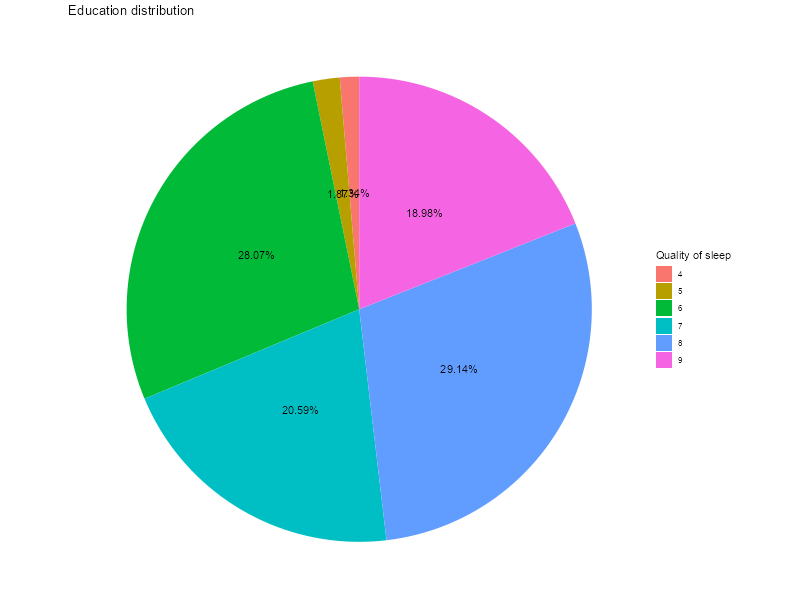

In [4]:
ggplot(data, aes(x = "", fill = as.factor(Quality.of.Sleep))) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Education distribution", fill = "Quality of sleep") +
  geom_text(aes(label = scales::percent(..count../sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  theme_void()

### Correlation matrix

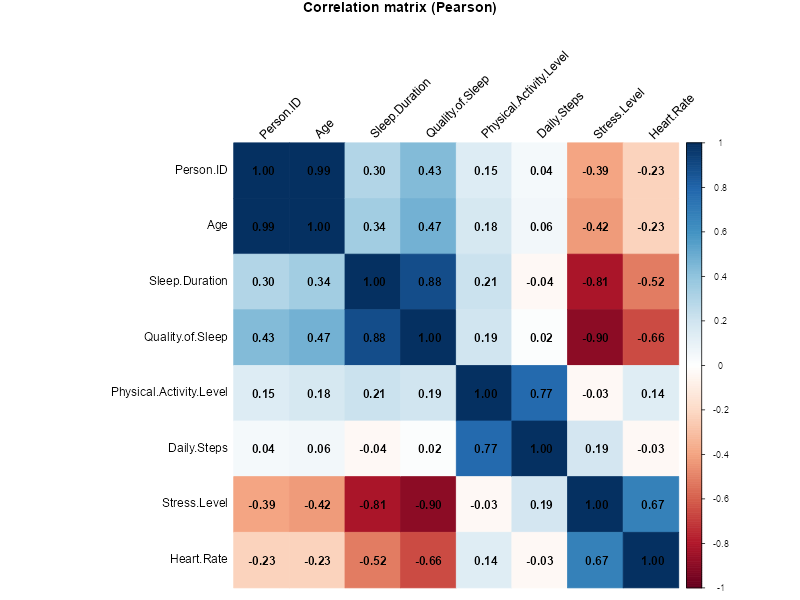

In [53]:
data |>
  select_if(is.numeric) |>
  cor(method = "pearson") |>
  corrplot(method = "color", col = COL2("RdBu", 200), order = "hclust",
         addCoef.col = "black", tl.col = "black", tl.srt = 45,
         title = "Correlation matrix (Pearson)", mar=c(0,0,1,0))

### Age and sleep quality

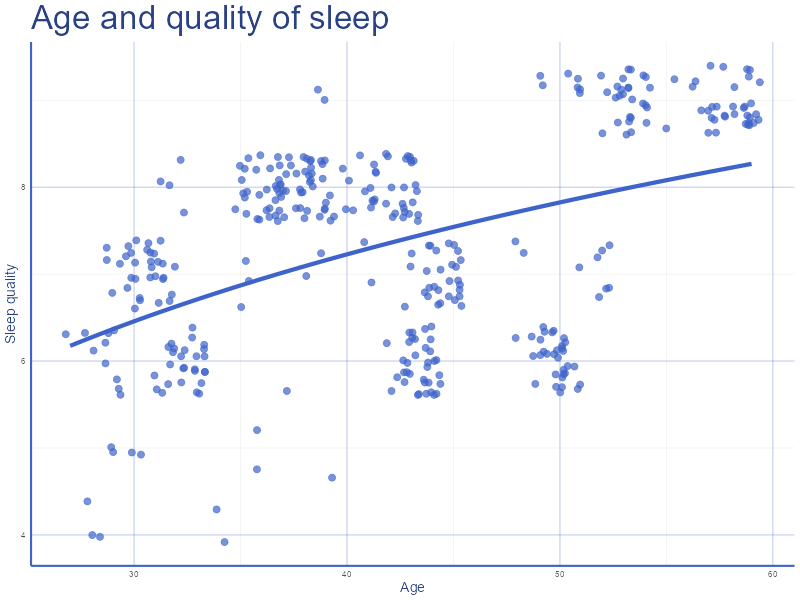

In [126]:
ggplot(data, aes(Age, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.7, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Age and quality of sleep", x = "Age", y = "Sleep quality") +
  theme_sleepy

### Sleep duration and its quality 

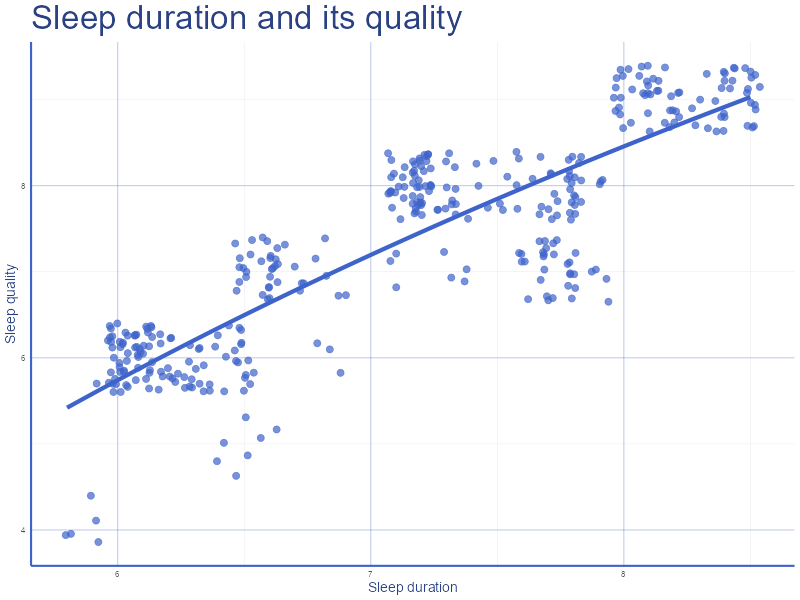

In [127]:
ggplot(data, aes(Sleep.Duration, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.7, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Sleep duration and its quality", x = "Sleep duration", y = "Sleep quality") +
  theme_sleepy

### Stress level and sleep quality

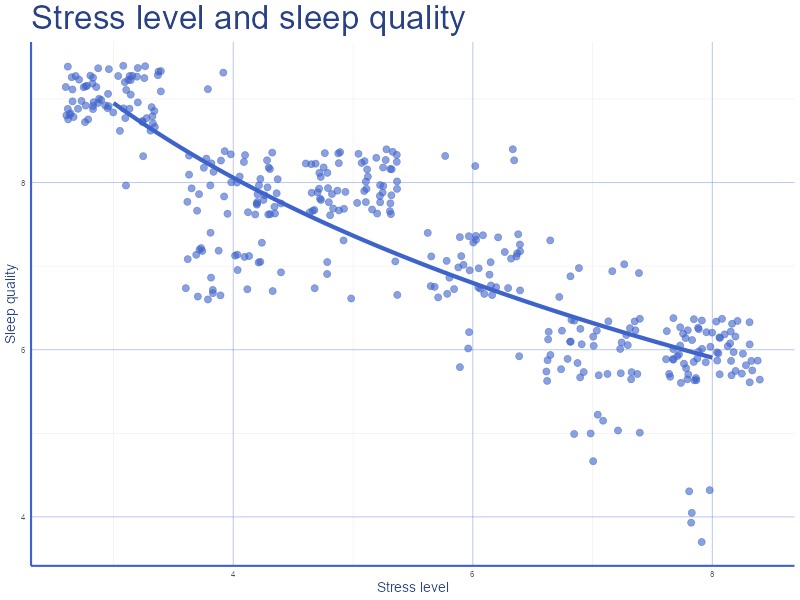

In [128]:
ggplot(data, aes(Stress.Level, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Stress level and sleep quality", x = "Stress level", y = "Sleep quality") +
  theme_sleepy

### Heart rate and sleep quality

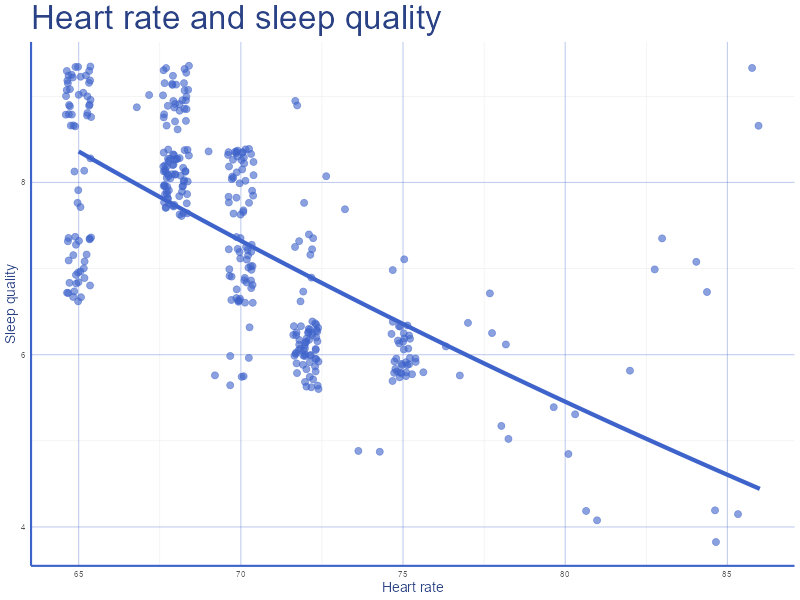

In [129]:
ggplot(data, aes(Heart.Rate, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Heart rate and sleep quality", x = "Heart rate", y = "Sleep quality") +
  theme_sleepy

### Physical activity and sleep quality

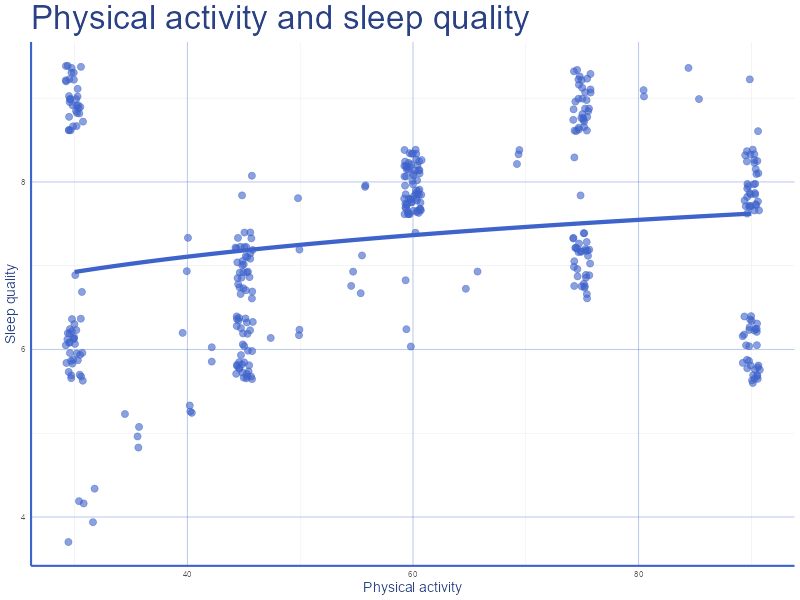

In [3]:
ggplot(data, aes(Physical.Activity.Level, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Physical activity and sleep quality", x = "Physical activity", y = "Sleep quality") +
  theme_sleepy

### Age and stress level

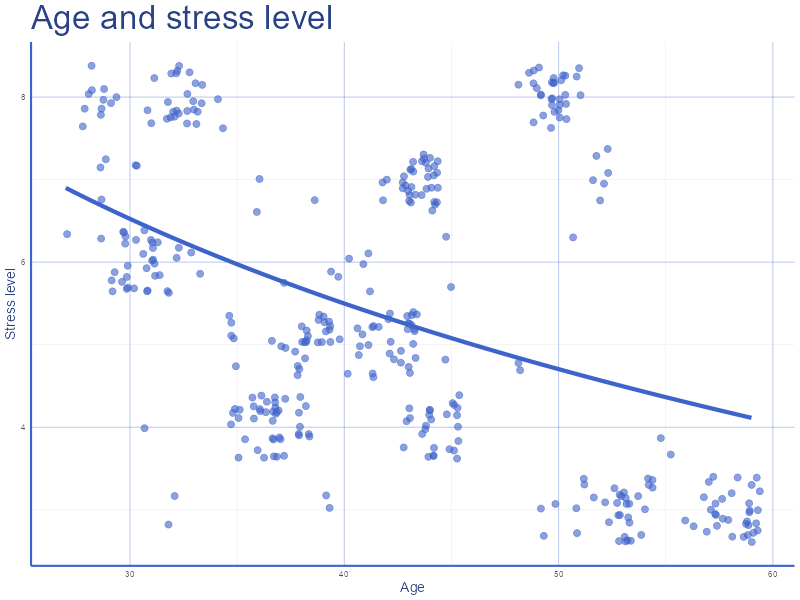

In [6]:
ggplot(data, aes(Age, Stress.Level)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Age and stress level", x = "Age", y = "Stress level") +
  theme_sleepy

### Sleep disorder and sleep quality

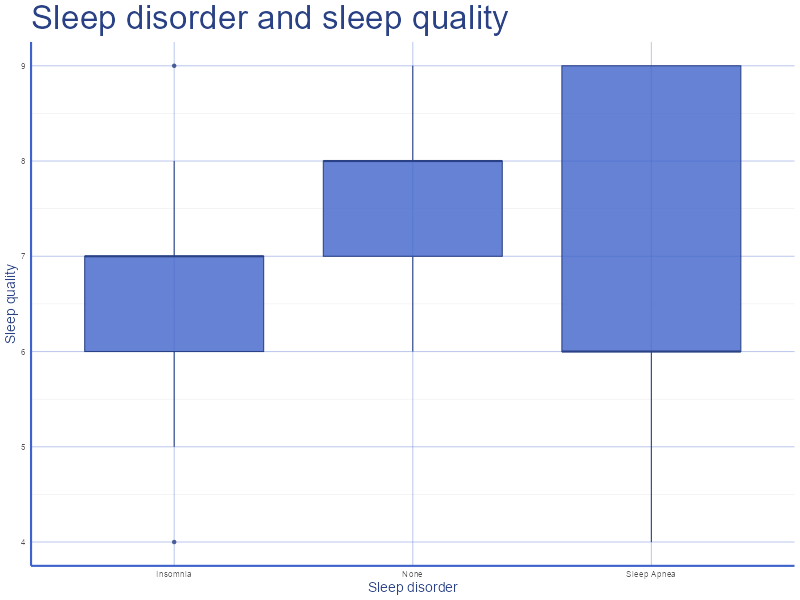

In [29]:
ggplot(data, aes(factor(Sleep.Disorder), Quality.of.Sleep)) +
  geom_boxplot(color = "#2a4285", fill = "#3e63ca", alpha = 0.8) +
  labs(title = "Sleep disorder and sleep quality", x = "Sleep disorder", y = "Sleep quality") +
  theme_sleepy

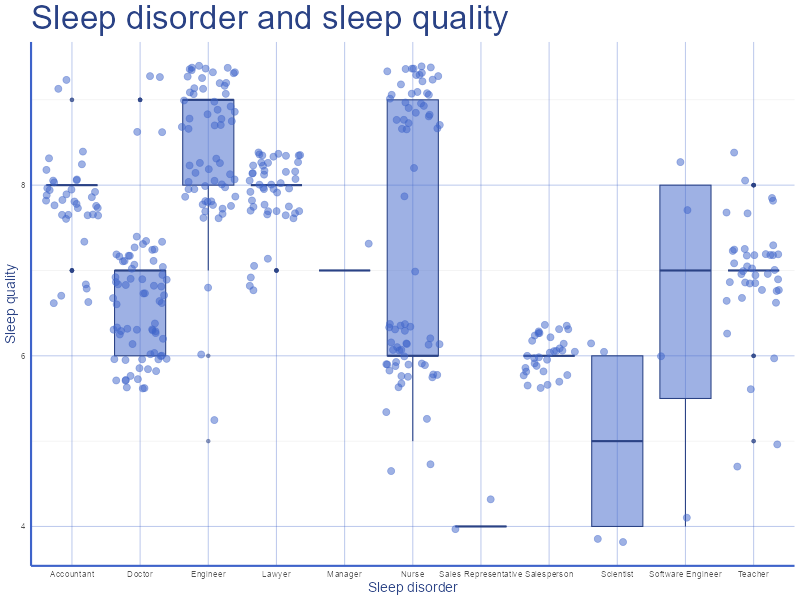

In [ ]:
ggplot(data, aes(factor(Occupation), Quality.of.Sleep)) +
  geom_boxplot(color = "#2a4285", fill = "#3e63ca", alpha = 0.5) +
  geom_jitter(alpha = 0.5, color = "#3e63ca", size = 3) +
  labs(title = "Occupation and sleep quality", x = "Occupation", y = "Sleep quality") +
  theme_sleepy

## Light cleaning

In [31]:
data_clean <- data |>
  mutate(
    Gender = factor(Gender),
    Occupation = factor(Occupation),
    BMI.Category = factor(BMI.Category),
    Sleep.Disorder = factor(Sleep.Disorder)
  )
glimpse(data_clean)

Rows: 374
Columns: 13
$ Person.ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, …
$ Gender                  <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, Mal…
$ Age                     <int> 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30,…
$ Occupation              <fct> Software Engineer, Doctor, Doctor, Sales Representative, Sales Representative, Software…
$ Sleep.Duration          <dbl> 6.1, 6.2, 6.2, 5.9, 5.9, 5.9, 6.3, 7.8, 7.8, 7.8, 6.1, 7.8, 6.1, 6.0, 6.0, 6.0, 6.5, 6.…
$ Quality.of.Sleep        <int> 6, 6, 6, 4, 4, 4, 6, 7, 7, 7, 6, 7, 6, 6, 6, 6, 5, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ Physical.Activity.Level <int> 42, 60, 60, 30, 30, 30, 40, 75, 75, 75, 30, 75, 30, 30, 30, 30, 40, 30, 40, 75, 75, 75,…
$ Stress.Level            <int> 6, 8, 8, 8, 8, 8, 7, 6, 6, 6, 8, 6, 8, 8, 8, 8, 7, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, …
$ BMI.Cate

## Forming training and test collections

In [ ]:
set.seed(seed)
selected_vars <- data_clean |> select(where(is.numeric) | where(is.factor))

index <- createDataPartition(selected_vars$Quality.of.Sleep, p = 0.8, list = FALSE)
train_data <- selected_vars[index, ]
test_data <- selected_vars[-index, ]

cat("Sizes:\nTrain =", nrow(train_data), "\nTest =", nrow(test_data))

Sizes:
Train = 301 
Test = 73

## Building regression models and rating them

In [86]:
formula <- as.formula("Quality.of.Sleep ~ .")
model_lr <- lm(formula, data = train_data)
summary(model_lr)


Call:
lm(formula = formula, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10452 -0.08406 -0.01773  0.05583  1.07248 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.310e+00  8.182e-01   8.935  < 2e-16 ***
Person.ID                      -2.684e-03  1.273e-03  -2.109   0.0358 *  
Age                             8.829e-02  1.671e-02   5.285 2.54e-07 ***
Sleep.Duration                  2.569e-01  4.935e-02   5.205 3.78e-07 ***
Physical.Activity.Level        -8.676e-04  1.645e-03  -0.527   0.5984    
Stress.Level                   -3.273e-01  2.831e-02 -11.559  < 2e-16 ***
Heart.Rate                     -4.519e-02  1.041e-02  -4.342 1.99e-05 ***
Daily.Steps                     2.855e-05  1.979e-05   1.443   0.1502    
GenderMale                      5.471e-01  7.430e-02   7.364 2.04e-12 ***
OccupationDoctor               -6.393e-01  9.095e-02  -7.029 1.62e-11 ***
OccupationEngineer 

## Model analysis

In [88]:
predictions <- predict(model_lr, test_data)

rmse <- sqrt(mean((test_data[["Quality.of.Sleep"]] - predictions)^2))
r2 <- caret::R2(predictions, test_data[["Quality.of.Sleep"]])
cat("RMSE =", rmse, "\nR2 =", r2)

RMSE = 0.2914568 
R2 = 0.940998

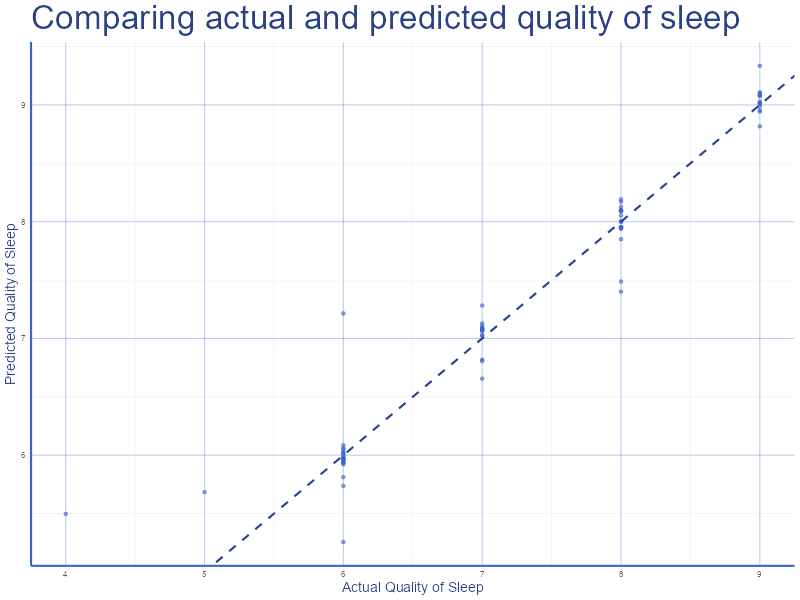

In [85]:
visualize_data <- data.frame(
  Actual = test_data[["Quality.of.Sleep"]],
  Predicted = predictions
)

ggplot(visualize_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "#3e63ca", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "#254394", linewidth = 1) +
  labs(
    title = "Comparing actual and predicted quality of sleep",
    x = "Actual Quality of Sleep",
    y = "Predicted Quality of Sleep"
  ) +
  theme_sleepy